<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('house-votes-84.data', header=None
                 , names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({"?" : np.nan, "y" : 1, "n" :0})

In [242]:
import pandas as pd
import collections
import pprint
from scipy.stats import *
from scipy import stats

def bprint(*args, indent=4):
    pprint.pprint(args,indent=4)
    

# flattens nested dictionaries by making dict.subdict.somekey into a new key subdict__somekey under dict
# https://stackoverflow.com/questions/6027558/flatten-nested-dictionaries-compressing-keys
def flatten(d, parent_key='', sep='__'):
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, collections.MutableMapping):
            items.extend(flatten(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)
    
# force map to evaluate and put the result into a list
def Map(func, x):
    v = []
    
    for thing in map(func, x):
        v.append(thing)
    return v

def to_dataframe(array_of_dict):
    fixed = Map(lambda d: flatten(d), array_of_dict)
    return pd.DataFrame(fixed)

def confidence_interval(X):
    std = np.std(X, ddof=1)
    n = len(X)
    standard_error = std / np.sqrt(n)
    t = stats.t.ppf(.95, n - 1)
    margin_of_error = t * standard_error
    return [np.mean(X), np.mean(X)-margin_of_error, np.mean(X)+margin_of_error]

def melt_and_concat(df_iterate, id_vars=''):
    return pd.concat( 
        Map(lambda df: pd.melt(df, id_vars=id_vars), df_iterate))
    
def in_range(value, _range):
    return (value >= _range[0]) and (value < _range[1])


In [195]:
df.head()

party  handicapped-infants  water-project  budget  \
0  republican                  0.0            1.0     0.0   
1  republican                  0.0            1.0     0.0   
2    democrat                  NaN            1.0     1.0   
3    democrat                  0.0            1.0     1.0   
4    democrat                  1.0            1.0     1.0   

   physician-fee-freeze  el-salvador-aid  religious-groups  \
0                   1.0              1.0               1.0   
1                   1.0              1.0               1.0   
2                   NaN              1.0               1.0   
3                   0.0              NaN               1.0   
4                   0.0              1.0               1.0   

   anti-satellite-ban  aid-to-contras  mx-missile  immigration  synfuels  \
0                 0.0             0.0         0.0          1.0       NaN   
1                 0.0             0.0         0.0          0.0       0.0   
2                 0.0             0.0         0.0          0.0       1.0   
3                 0.0             0.0         0.0          0.0       1.0   
4                 0.0             0.0         0.0          0.0       1.0   

   education  right-to-sue  crime  duty-free  south-africa  
0        1.0           1.0    1.0        0.0           1.0  
1        1.0           1.0    1.0        0.0           NaN  
2        0.0           1.0    1.0        0.0           0.0  
3        0.0           1.0    0.0        0.0           1.0  
4        NaN           1.0    1.0        1.0           1.0

In [196]:
rep = df[df.party=='republican']
dem = df[df.party=='democrat']
np_rep = rep.drop('party',axis=1)
np_dem = dem.drop('party',axis=1)

In [197]:
confidence_interval(np_rep['handicapped-infants'])

[0.18787878787878787, 0.13788018574049443, 0.2378773900170813]

In [198]:
# can see how the mean is between the confidence intervals.
np_rep.mean()

handicapped-infants     0.187879
water-project           0.506757
budget                  0.134146
physician-fee-freeze    0.987879
el-salvador-aid         0.951515
religious-groups        0.897590
anti-satellite-ban      0.240741
aid-to-contras          0.152866
mx-missile              0.115152
immigration             0.557576
synfuels                0.132075
education               0.870968
right-to-sue            0.860759
crime                   0.981366
duty-free               0.089744
south-africa            0.657534
dtype: float64

In [199]:
t = stats.t.ppf(.975, 99)
t

1.9842169515086827

In [200]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # makes jupyter handle javascript apparently
import cufflinks as cf # pandas to plotly communication library
cf.go_offline()

In [201]:
rep.iplot(kind='hist', bins=2, labels=['Yes', 'No'])

In [202]:
dem.iplot(kind='hist', bins=2)

In [203]:
test_df
melted = melt_and_concat([rep, dem], id_vars='party')

In [204]:
melted.head()

party             variable  value
0  republican  handicapped-infants    0.0
1  republican  handicapped-infants    0.0
2  republican  handicapped-infants    0.0
3  republican  handicapped-infants    0.0
4  republican  handicapped-infants    0.0

In [205]:
melted2 = melted.set_index('party')
melted2.head()

variable  value
party                                 
republican  handicapped-infants    0.0
republican  handicapped-infants    0.0
republican  handicapped-infants    0.0
republican  handicapped-infants    0.0
republican  handicapped-infants    0.0

In [206]:
rep.iplot(kind='scatter')

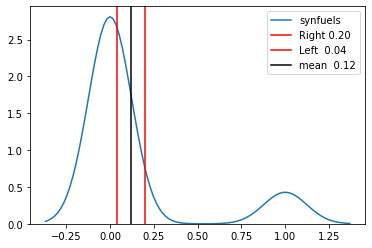

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(rep['synfuels'].dropna())
CI = confidence_interval(rep['synfuels'].dropna().sample(n=50))
plt.axvline(x=CI[1], color='red',label ='Right {:.2f}'.format(CI[2]))
plt.axvline(x=CI[2], color='red',label ='Left  {:.2f}'.format(CI[1]))
plt.axvline(x=CI[0], color='k'  ,label ='mean  {:.2f}'.format(CI[0]));
plt.legend();

In [208]:
CI

[0.12, 0.042169349524353444, 0.19783065047564655]

In [209]:
# Interpret the confidence interval - what does it tell you about the data and its distribution?
#    with the sample size chosen, that is how sure you can be the mean of that sample is
#    within interval. 
violated_count = 1
for i in range(100):
    sample_mean = rep['synfuels'].dropna().sample(n=50).mean()
    if not in_range(sample_mean, CI[1:3]):
        bprint('Outside of confidence interval', violated_count)
        violated_count += 1

('Outside of confidence interval', 1)
('Outside of confidence interval', 2)
('Outside of confidence interval', 3)
('Outside of confidence interval', 4)
('Outside of confidence interval', 5)
('Outside of confidence interval', 6)
('Outside of confidence interval', 7)
('Outside of confidence interval', 8)
('Outside of confidence interval', 9)
('Outside of confidence interval', 10)
('Outside of confidence interval', 11)


In [ ]:
38

In [162]:
rep['synfuels'].dropna().shape[0]

159

In [211]:
flag_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data', header=None)

In [213]:
flag_data.head()

0   1   2     3   4   5   6   7   8   9   ...  20  21  22  23  \
0     Afghanistan   5   1   648  16  10   2   0   3   5  ...   0   0   1   0   
1         Albania   3   1    29   3   6   6   0   0   3  ...   0   0   1   0   
2         Algeria   4   1  2388  20   8   2   2   0   3  ...   0   0   1   1   
3  American-Samoa   6   3     0   0   1   1   0   0   5  ...   0   0   0   0   
4         Andorra   3   1     0   0   6   0   3   0   3  ...   0   0   0   0   

   24  25  26 27     28     29  
0   0   1   0  0  black  green  
1   0   0   1  0    red    red  
2   0   0   0  0  green  white  
3   1   1   1  0   blue    red  
4   0   0   0  0   blue    red  

[5 rows x 30 columns]

In [234]:
# 1. landmass by catgeory
# 9. 
# 24. crescent
flag_data[1], flag_data[5]

(0      5
 1      3
 2      4
 3      6
 4      3
       ..
 189    6
 190    3
 191    4
 192    4
 193    4
 Name: 1, Length: 194, dtype: int64, 0      10
 1       6
 2       8
 3       1
 4       6
        ..
 189     1
 190     6
 191    10
 192    10
 193    10
 Name: 5, Length: 194, dtype: int64)

In [232]:
# 1 landmass 23 whether or not a crescent in is the flag.
observed = [flag_data[1], flag_data[23]]
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 

Chi-Squared: 116.6899470899471
P-value: 0.9999969896925281
Degrees of Freedom: 193


In [236]:
# 1 landmass 6 religion
observed = [flag_data[1], flag_data[6]]
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 

Chi-Squared: 186.748685593858
P-value: 0.6131934305165679
Degrees of Freedom: 193


In [244]:
expected[0][0:10]

array([4.33899821, 5.57871199, 3.71914132, 4.33899821, 1.85957066,
       5.57871199, 1.23971377, 1.23971377, 1.23971377, 1.23971377])

In [241]:
observed[0][0:10]

0    5
1    3
2    4
3    6
4    3
5    4
6    1
7    1
8    2
9    2
Name: 1, dtype: int64

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.frame

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)